In [ ]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, classification_report

# Load the training, validation, and test datasets
train_data = pd.read_csv('Train_Set.csv')
val_data = pd.read_csv('Validation_Set.csv')
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['Severity'])
y_train = train_data['Severity']

X_val = val_data.drop(columns=['Severity'])
y_val = val_data['Severity']

X_test = test_data.drop(columns=['Severity'])
y_test = test_data['Severity']

# Initialize the TabNetClassifier with a learning rate scheduler
clf2 = TabNetClassifier(   
    verbose=1,  
    seed=42
)

# Train the model
clf2.fit(
    X_train.values, y_train,
    eval_set=[(X_train.values, y_train), (X_val.values, y_val)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=50,  
    patience=10,     
    batch_size=1024,
    virtual_batch_size=128, 
)

# Save the trained model
saving_path_name = "./tabnet_model_3"
saved_filepath = clf2.save_model(saving_path_name)
print(f"Model saved to: {saved_filepath}")

e:\Python\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.92027 | train_accuracy: 0.33232 | valid_accuracy: 0.44177 |  0:05:15s
epoch 1  | loss: 0.83942 | train_accuracy: 0.32523 | valid_accuracy: 0.63587 |  0:10:26s
epoch 2  | loss: 0.80822 | train_accuracy: 0.31176 | valid_accuracy: 0.64521 |  0:15:36s
epoch 3  | loss: 0.80226 | train_accuracy: 0.33674 | valid_accuracy: 0.63124 |  0:20:45s
epoch 4  | loss: 0.78786 | train_accuracy: 0.32589 | valid_accuracy: 0.59921 |  0:26:00s
epoch 5  | loss: 0.7804  | train_accuracy: 0.33123 | valid_accuracy: 0.63513 |  0:31:10s
epoch 6  | loss: 0.77178 | train_accuracy: 0.32911 | valid_accuracy: 0.4962  |  0:36:26s
epoch 7  | loss: 0.7627  | train_accuracy: 0.36305 | valid_accuracy: 0.68682 |  0:41:36s
epoch 8  | loss: 0.75741 | train_accuracy: 0.30524 | valid_accuracy: 0.59103 |  0:46:45s
epoch 9  | loss: 0.75281 | train_accuracy: 0.31282 | valid_accuracy: 0.63522 |  0:52:00s
epoch 10 | loss: 0.75119 | train_accuracy: 0.32602 | valid_accuracy: 0.60493 |  0:57:10s
epoch 11 | loss: 0.74

e:\Python\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Successfully saved model at ./tabnet_model_3.zip
Model saved to: ./tabnet_model_3.zip


e:\Python\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
e:\Python\Lib\site-packages\pytorch_tabnet\abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Ple

Model loaded successfully.


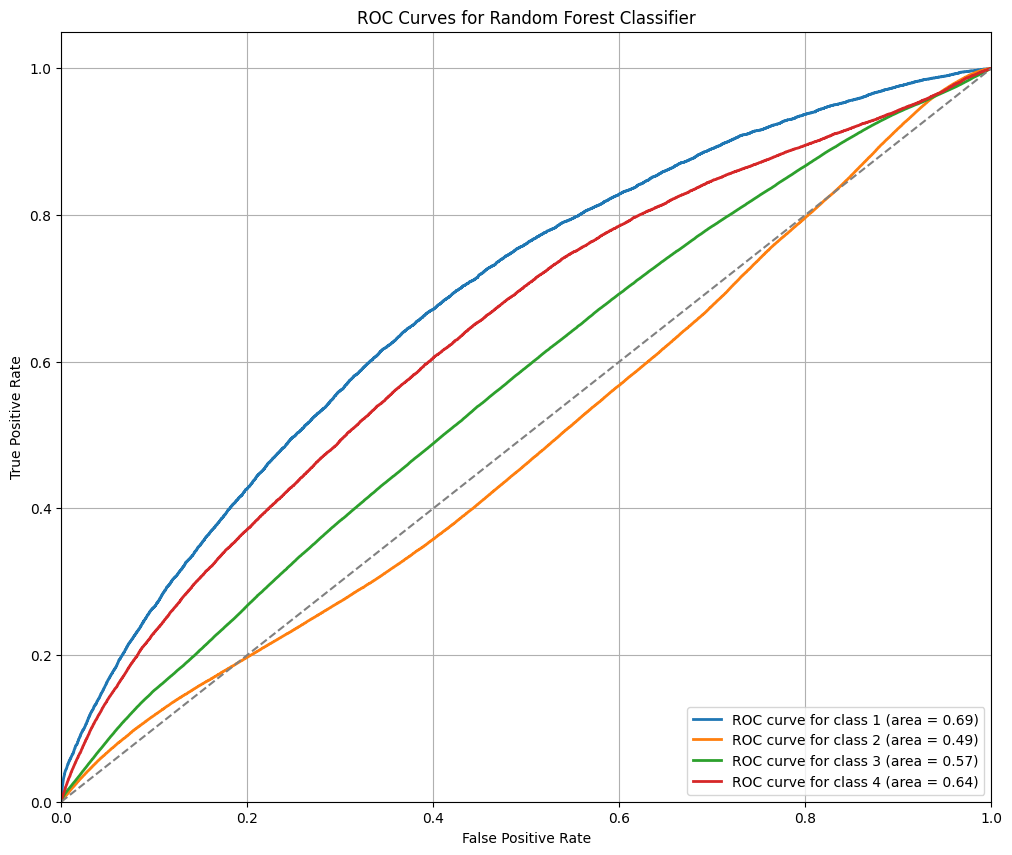

TabNet Accuracy: 0.7645

Classification Report:
              precision    recall  f1-score   support

           1       0.14      0.00      0.00      9362
           2       0.80      0.95      0.87    873568
           3       0.34      0.02      0.03    188164
           4       0.08      0.13      0.10     27219

    accuracy                           0.76   1098313
   macro avg       0.34      0.28      0.25   1098313
weighted avg       0.70      0.76      0.70   1098313



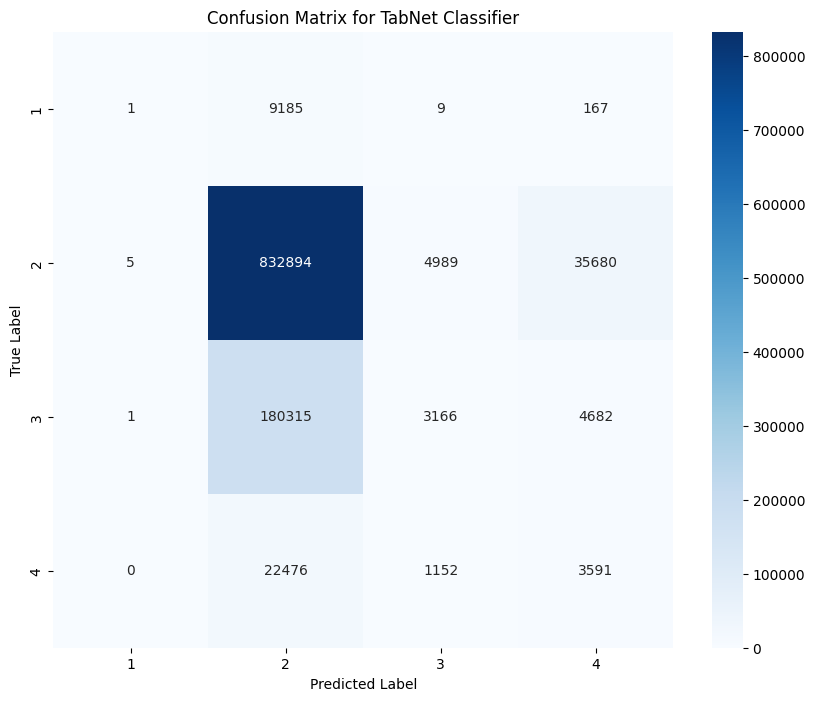

In [1]:
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import label_binarize
from pytorch_tabnet.tab_model import TabNetClassifier

train_data = pd.read_csv('Train_Set.csv')
val_data = pd.read_csv('Validation_Set.csv')
test_data = pd.read_csv('Test_Set.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['Severity'])
y_train = train_data['Severity']

X_val = val_data.drop(columns=['Severity'])
y_val = val_data['Severity']

X_test = test_data.drop(columns=['Severity'])
y_test = test_data['Severity']

loaded_clf = TabNetClassifier()
loaded_clf.load_model('tabnet_model_3.zip')
print("Model loaded successfully.")

y_pred = loaded_clf.predict(X_test.values)

y_prob = loaded_clf.predict_proba(X_test.values)

# Binarize the true labels for ROC curve (for multi-class)
classes = sorted(y_test.unique())
y_test_binarized = label_binarize(y_test, classes=classes)
n_classes = y_test_binarized.shape[1]

# Plot ROC curves for each class
plt.figure(figsize=(12, 10))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for class {classes[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"TabNet Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for TabNet Classifier')
plt.show()